In [1]:
import os
from pathlib import Path #for path of the required folders
from keras.preprocessing import image #For going through images
import matplotlib.pyplot as plt #For plotting

Using TensorFlow backend.


In [2]:
p = Path("./Dataset/") #Defining a path to our folder

dirs = p.glob("*") #Loading all the folders of the dataset in dirs

for i in dirs:
    print(i) #Printing them

Dataset\Bulbasaur
Dataset\Meowth
Dataset\Pikachu


In [12]:
p = Path("./Dataset/") #Defining a path to our folder

dirs = p.glob("*") #Loading all the folders of the dataset in dirs

image_data = [] #Store all the images
labels = [] #Store all the labels

#Optional
image_paths = []

label_dict = {"Pikachu":0,"Bulbasaur":1, "Meowth":2} #Mapping the label of the pokemons
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Meowth"} #To get name of pokemons from labels

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1] #The dataset path name is broken and only image of pokemon is recorded
    
    cnt = 0
    print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the pokemen
    for img_path in folder_dir.glob("*.jpg"): #Loads all images with jpg in picture
        img = image.load_img(img_path,target_size=(40,40)) #In the img we are loading the image after shaping it into 40*40
        img_array = image.img_to_array(img) #Converting the image into an array
        image_data.append(img_array) #Storing that array in image data
        labels.append(label_dict[label]) #Will store the label of the pokemon
        cnt += 1
        
    print(cnt)

Dataset\Bulbasaur
173
Dataset\Meowth
70
Dataset\Pikachu
199


In [13]:
import numpy as np
X = np.array(image_data)
Y = np.array(labels)
print(X.shape) #442 images, each of 100 height, 100 width, and three channels showing three colours
print(Y.shape)

(442, 40, 40, 3)
(442,)


In [10]:
# Draw some pokemons
def drawImg(img,label): #
    plt.title(label2pokemon[label]) #Will show the title of pokemon
    plt.imshow(img) #Display image
    plt.show()

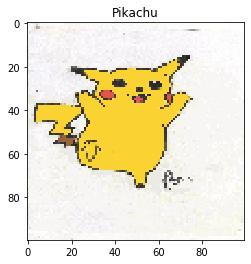

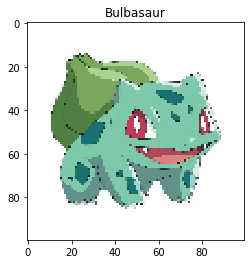

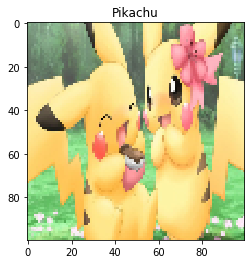

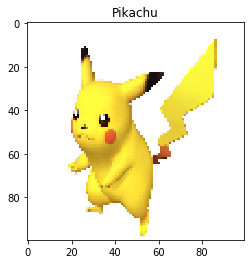

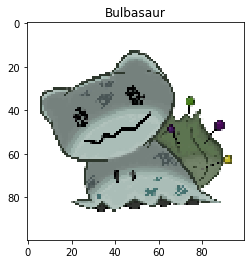

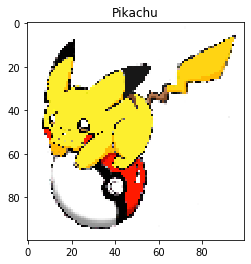

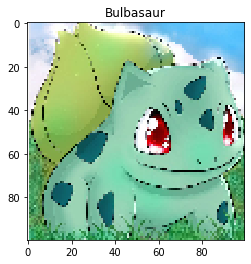

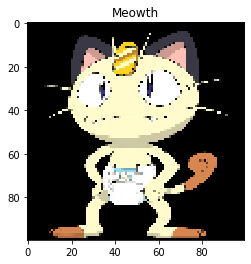

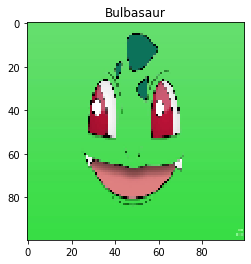

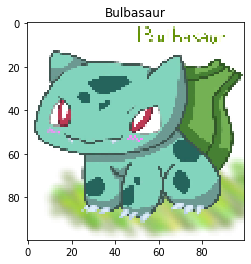

In [11]:
for i in range(10):
    r = np.random.randint(400)
    drawImg(X[r]/255.0,Y[r])
#Image quality is high because I used 100*100, but for testing features have been reduced to 40*40

In [15]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=755ea2a03aab56072866079b8b8efc353eaa6be37148563a1ee9c1ffc2605554
  Stored in directory: c:\users\sachin sourav jha\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [16]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2) #Shuffling to make our dataset random

#Normalisation
X = X/255.0
print(Y)

[2 0 1 1 0 1 0 1 2 1 0 2 0 0 1 0 0 2 0 0 0 2 0 1 0 1 1 0 1 1 0 2 1 0 0 0 2
 0 1 1 0 0 0 1 1 1 0 0 0 0 0 2 1 0 0 0 0 1 1 1 0 1 2 1 1 1 2 0 1 1 0 0 1 2
 1 2 1 0 0 2 0 0 0 0 1 0 0 1 2 1 1 1 0 0 1 0 1 2 1 2 1 2 1 0 1 1 0 0 2 0 0
 0 0 1 0 0 1 2 1 1 0 0 2 1 0 0 0 0 0 0 0 2 1 2 0 0 1 1 0 2 0 0 0 0 2 0 2 1
 1 0 2 0 0 1 2 1 0 0 1 0 1 2 0 1 0 1 2 0 0 1 0 2 1 1 0 0 0 1 1 0 0 1 1 1 0
 2 2 2 0 1 1 2 1 0 1 0 0 0 1 2 1 1 0 0 2 1 2 0 2 1 2 2 1 1 0 2 0 0 1 1 0 1
 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 2 0 2 1 2 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 1 1 1 2 1 2 1 0 1 0 1 0 0 2 2 0 0 2 0 1 1 0 0 0 1 1 1 1 0 0 0 2 0 1 0 0
 1 1 0 0 0 2 2 1 0 0 0 0 0 1 1 0 0 0 0 2 0 0 1 2 0 1 0 1 0 1 0 1 1 1 0 0 2
 2 1 2 0 0 0 1 1 0 1 2 0 2 0 1 1 0 1 2 0 2 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 0 2 1 0 0 0 2 0 1 0 1 2 0 0 1 1 2 1 1 1 1 2 0 0 2
 1 0 0 0 0 1 1 1 0 1 0 0 1 2 1 0 1 1 0 2 0 0 1 2 0 1 1 0 0 1 0 1 1 1 1]


In [17]:
### Create Training and Testing Set
X_ = np.array(X) #putting X in X_
Y_ = np.array(Y) #putting Y in Y_

#Training Set
X = X_[:360,:] #first 360 in train set
Y = Y_[:360]

#Test Set
XTest = X_[360:,:] #Rest 82 will go in test set
YTest = Y_[360:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(360, 40, 40, 3) (360,)
(82, 40, 40, 3) (82,)


In [53]:

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True) #Keeping dims true ensures that it only adds particular axis wise
    return ans

In [54]:
class Neural:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {} #Dictionary containing all weights and biases
        
        #Taking randdom values for weights and biases in each layer
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0]) #Creating a matrix of weights so that all neurons in previous layer 
        #can multiply column wise with matrix to give one neuron in next layer
        #We need number of rows = number of neurons in previous layer
        #Number of columns = number of neurons in next layer
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None #To store the values
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3'] #From model dictionary getting values of W1.W2,W3
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3'] #From model dictionary getting values of b1.b2,b3
        
        z1 = np.dot(x,W1) + b1 #Doing the required dot product and adding bias
        a1 = np.tanh(z1) #Passing the tanh which gives value between -1 and 1
        #First hidden layer done
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        #Second hidden layer done
        
        z3 = np.dot(a2,W3) + b3
        #Output
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_) #The values of a1, a2, and predicted y ie y_ is stored to be used during backpropagation
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3'] #Calling all the values of weights
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3'] #Calling all the values of biases
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y # #Finding difference of predicted and real
        dw3 = np.dot(a2.T,delta3) #Computing value of dw
        db3 = np.sum(delta3,axis=0) #Computing value of bias
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T) #Derivative of tanh * dot product of W and delta of forward layer
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1 #Updating value of the weight
        self.model['b1']  -= learning_rate*db1 #Updating value of the bias
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1) #taking max of each column in output, so we get predicted output for our given example
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3'] #Returning the final weights
        a1,a2,y_ = self.activation_outputs #Returning the answers for each layer and output
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)


In [55]:

def loss(y_oht,p): #Will put original value in the form of hot vector and predicted
    l = -np.mean(y_oht*np.log(p)) #Putting formula for k
    return l

def one_hot(y,depth):
    
    m = y.shape[0] #Number of rows
    y_oht = np.zeros((m,depth)) #Rows = number of examples, and depth = number of classes
    y_oht[np.arange(m),y] = 1 #In a particular row, it will put one where label gives the answer
    return y_oht

In [61]:
def train(X,Y,model,epochs,learning_rate):
    training_loss = []
    
    classes = 3 #We have three pokemons
    Y_OHT = one_hot(Y,classes)
    
    for i in range(epochs):
        
        Y_ = model.forward(X) #Computing value going forward
        l = loss(Y_OHT,Y_) #Computing the loss
        training_loss.append(l) #Then the loss is loaded
        model.backward(X,Y_OHT,learning_rate) #The model goes back and adjusts weight according to the loss
        
        if(i%50==0):
            print("Epoch %d Loss %.4f"%(i,l))
            
    
    return training_loss

In [62]:
model = Neural(input_size=4800,layers=[100,50],output_size=3)
#Input size = 4800 because image = 40*40*3

In [63]:

X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

#Flattening both train and test sets to make it 4800 

(360, 4800)
(82, 4800)


In [70]:
losses= train(X,Y,model,350,0.0002) #Finally training our model
#Learning rate value should be low, as high value can give bad results

Epoch 0 Loss 0.0925
Epoch 50 Loss 0.0909
Epoch 100 Loss 0.0893
Epoch 150 Loss 0.0881
Epoch 200 Loss 0.0871
Epoch 250 Loss 0.0860
Epoch 300 Loss 0.0848


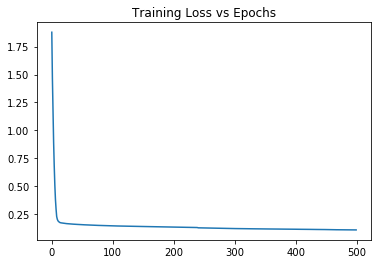

In [66]:
from matplotlib import pyplot as plt
plt.title("Training Loss vs Epochs")
plt.plot(losses)

plt.show()

In [71]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9028
Test Acc 0.7683


In [78]:
outputs = model.predict(X)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)
#Diagnol one are correct
#First row and column belongs to Pikachu
#Second row and column belongs to Pikachu
#Third row and column belongs to Pikachu
#So it means 162 were classified as Pikachu and they were pikachu
#Seven pikachus were classified as bulbasors
#20 pikachus were classified as meowths
#So column value represents how they were classfied while row tells actual one

[[162   7  20]
 [  2 127   5]
 [  0   1  36]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(outputs,Y))
#Precision total number of correctly classified among type / total number of classified
#Number of correctly classified pikachus (162)/ total number of those classified as pikachus(162+2=164)

#Recoil total number of correctly classified among type / total number of those classes
#Number of correctly classified pikachus (162)/ total number of those pikachus(162+7+20=189)

#Precision = True/sum of columns
#Recall = True/Sum of Rows

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       189
           1       0.94      0.95      0.94       134
           2       0.59      0.97      0.73        37

    accuracy                           0.90       360
   macro avg       0.84      0.93      0.87       360
weighted avg       0.93      0.90      0.91       360



In [81]:
Testoutput = model.predict(XTest)
print(classification_report(Testoutput,YTest))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80        47
           1       0.66      0.86      0.75        29
           2       0.56      0.83      0.67         6

    accuracy                           0.77        82
   macro avg       0.72      0.80      0.74        82
weighted avg       0.81      0.77      0.77        82

